In [27]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
dataset =  pd.read_csv("healthcare-dataset-stroke-data.csv")

In [37]:
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].median())

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
def encoding(dataset,column_name):
  label_encoder = LabelEncoder()
  return label_encoder.fit_transform(dataset[column_name])

In [39]:

dataset['gender'] = encoding(dataset,'gender')
dataset['ever_married'] = encoding(dataset,'ever_married')
dataset['work_type'] = encoding(dataset,'work_type')
dataset['Residence_type'] = encoding(dataset,'Residence_type')
dataset['smoking_status'] = encoding(dataset,'smoking_status')

In [40]:
dataset.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

In [41]:
dataset = dataset.drop('id',axis =1)

In [42]:
input = dataset.drop('stroke',axis =1)
output = dataset['stroke']
input = np.asarray(input)
output= np.asarray(output)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,output,random_state=0)

In [44]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [45]:
print(f'x_train', x_train.shape)
print(f'y_train',y_train.shape)
print(f'x_test',x_test.shape)
print(f'y_test',y_test.shape)

x_train (3832, 10)
y_train (3832,)
x_test (1278, 10)
y_test (1278,)


In [46]:
dataset.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix 

In [48]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [49]:
results = pd.DataFrame(columns = ['Model','Train_Score',"Test_Score","Precision","Recall","Auc","F1"])

In [50]:
def models(modelName , defintionTheModelAndHisParameter,x_train,y_train,x_test,y_test,model,parameter,pRange,results = results):
    classifier = defintionTheModelAndHisParameter.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    confusionMatrixForTheClassifier = confusion_matrix(y_test,y_predicted )
    precision = precision_score(y_test,y_predicted)
    recall = recall_score(y_test,y_predicted)
    scoreOnTest = classifier.score(x_test,y_test)
    scoreOnTrain =classifier.score(x_train,y_train)
    classificationReportForTheClassifier =classification_report(y_test, y_predicted)
    auc1 = roc_auc_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    print(modelName)
    print("score on train data with", modelName," :", scoreOnTrain)
    print("---------------------------------------------------------------------------------------")
    print("score on test data with ", modelName," :",scoreOnTest)
    print("---------------------------------------------------------------------------------------")
    print("preceision: ", precision)
    print("---------------------------------------------------------------------------------------")
    print("recall: ",recall)
    print("---------------------------------------------------------------------------------------")
    print("Most frequent class (",modelName,")\n")
    print_cm(confusionMatrixForTheClassifier, ['Not one', 'One'])
    print("---------------------------------------------------------------------------------------")
    print("classification report:\n",confusionMatrixForTheClassifier)
    print("---------------------------------------------------------------------------------------")
    print('Test set AUC: ', auc1)
    print("---------------------------------------------------------------------------------------")
    print('F1: ',f1)
    ####Learning curve
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    N, train_lc, val_lc = learning_curve(defintionTheModelAndHisParameter,
                                         x_train, y_train, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[0].set_ylim((0, 1))
    ax[0].set_xlim((N[0], N[-1]))
    ax[0].set_xlabel('training size')
    ax[0].set_ylabel('score')
    ax[0].set_title('Leaning curve')
    ax[0].legend(loc='best')
    ######    Validation curve
    name = parameter
    print(name)
    train_score, val_score = validation_curve(model, x_train, y_train,
                                          param_name= name ,
                                          param_range = pRange,
                                          cv=7)
    ax[1].plot(pRange, np.median(train_score, 1), color='blue', label='training score')
    ax[1].plot(pRange, np.median(val_score, 1), color='red', label='validation score')
    ax[1].legend(loc='best')
    ax[1].set_ylim(0, 1)
    ax[1].set_xlabel('pRange')
    ax[1].set_ylabel('score')
  ### auc 
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predicted)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.05])
    plt.plot(fpr_lr, tpr_lr, lw=2, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.show()



    i = results.shape[0]
    results.loc[i,'Model'] = modelName
    results.loc[i,'Train_Score'] = scoreOnTrain
    results.loc[i,"Test_Score"] = scoreOnTest
    results.loc[i,"Precision"] = precision
    results.loc[i,'Recall'] = recall
    results.loc[i,'Auc'] = auc1
    results.loc[i,'F1'] = f1
    

DummyClassifier
score on train data with DummyClassifier  : 0.9519832985386222
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
---------------------------------------------------------------------------------------
F1:  0.0
strat

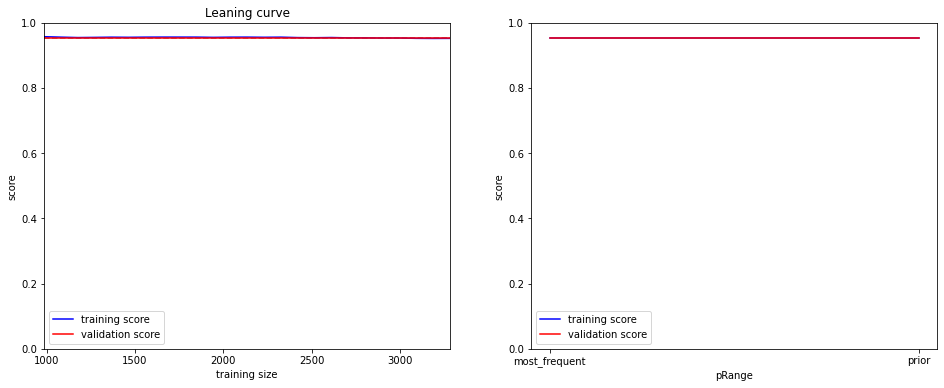

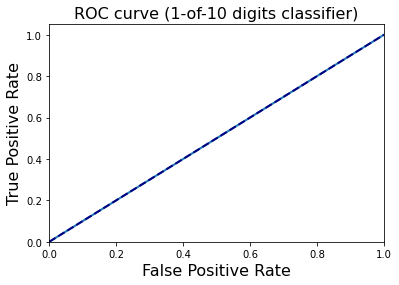

logistic regression
score on train data with logistic regression  : 0.9522442588726514
---------------------------------------------------------------------------------------
score on test data with  logistic regression  : 0.9483568075117371
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression )

            Not one     One 
    Not one  1212.0     1.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1212    1]
 [  65    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.49958779884583676
----------------------------------------------------------------------

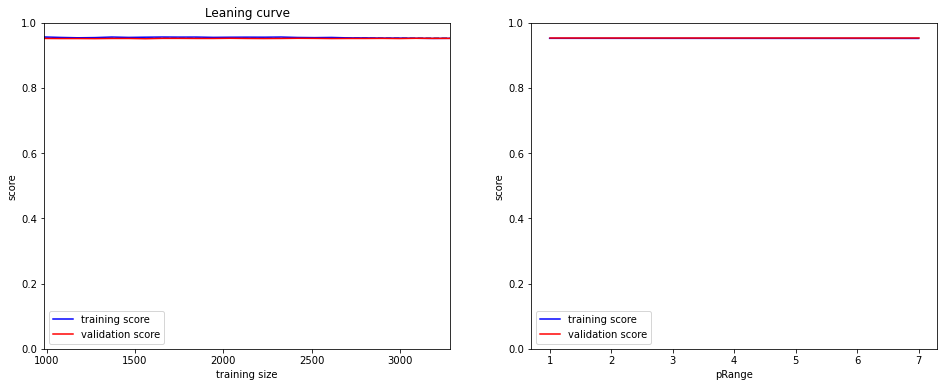

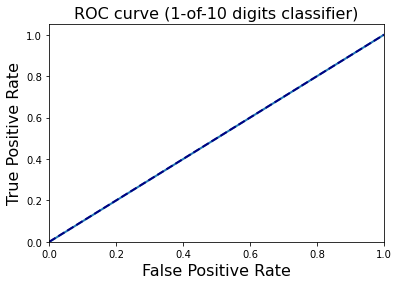

knn
score on train data with knn  : 0.9532881002087683
---------------------------------------------------------------------------------------
score on test data with  knn  : 0.9444444444444444
---------------------------------------------------------------------------------------
preceision:  0.2
---------------------------------------------------------------------------------------
recall:  0.03076923076923077
---------------------------------------------------------------------------------------
Most frequent class ( knn )

            Not one     One 
    Not one  1205.0     8.0 
        One    63.0     2.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    8]
 [  63    2]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5120870061513095
---------------------------------------------------------------------------------------
F1:  0.05333333333333334
weight

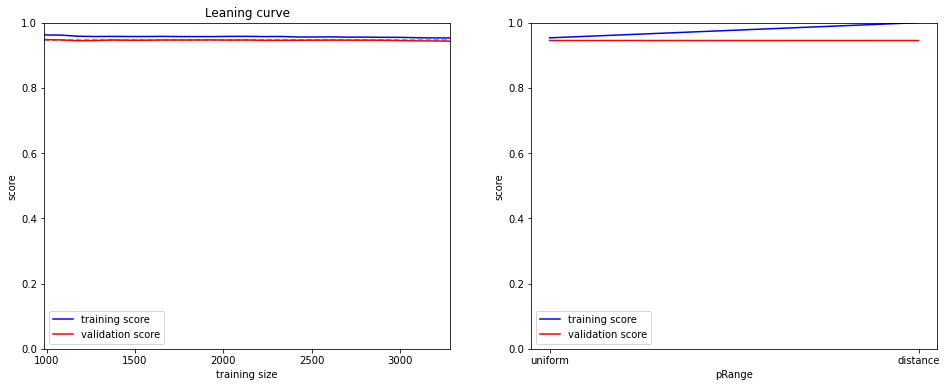

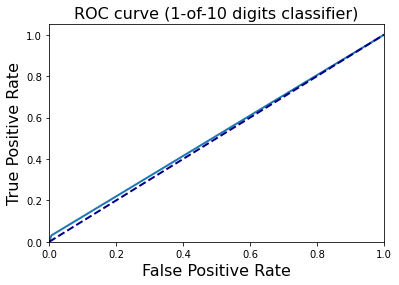

guassianNB
score on train data with guassianNB  : 0.8710855949895616
---------------------------------------------------------------------------------------
score on test data with  guassianNB  : 0.8826291079812206
---------------------------------------------------------------------------------------
preceision:  0.20279720279720279
---------------------------------------------------------------------------------------
recall:  0.4461538461538462
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB )

            Not one     One 
    Not one  1099.0   114.0 
        One    36.0    29.0 
---------------------------------------------------------------------------------------
classification report:
 [[1099  114]
 [  36   29]]
---------------------------------------------------------------------------------------
Test set AUC:  0.6760859915023146
----------------------------------------------------------------------------

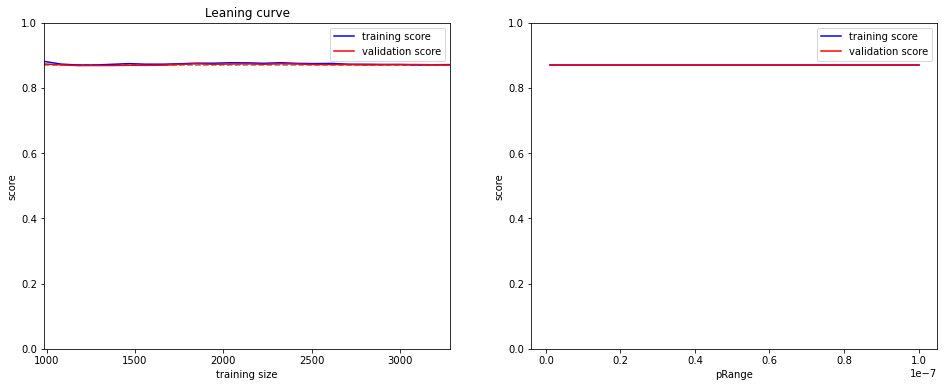

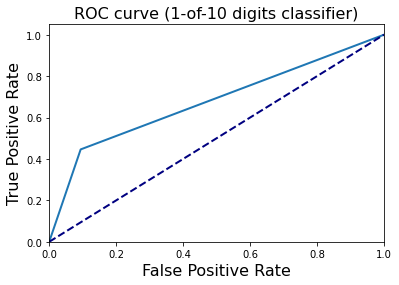

support vector machine
score on train data with support vector machine  : 0.9519832985386222
---------------------------------------------------------------------------------------
score on test data with  support vector machine  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
--------------------------------------------------------------------------

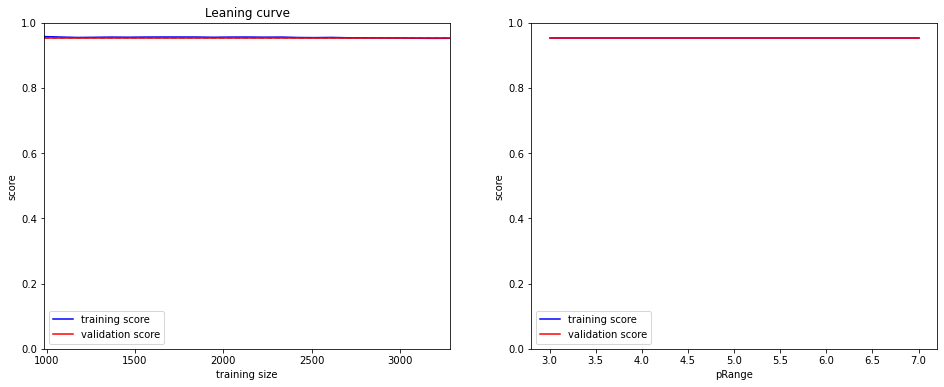

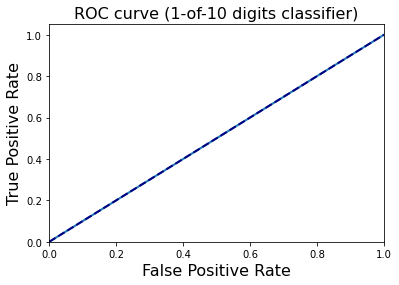

DecisionTree Classifier
score on train data with DecisionTree Classifier  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier  : 0.9131455399061033
---------------------------------------------------------------------------------------
preceision:  0.11666666666666667
---------------------------------------------------------------------------------------
recall:  0.1076923076923077
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier )

            Not one     One 
    Not one  1160.0    53.0 
        One    58.0     7.0 
---------------------------------------------------------------------------------------
classification report:
 [[1160   53]
 [  58    7]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5319994926755026
---------------------------------------

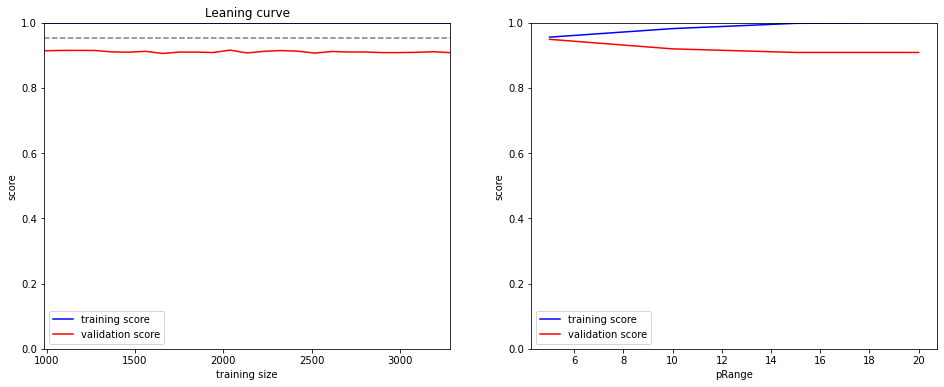

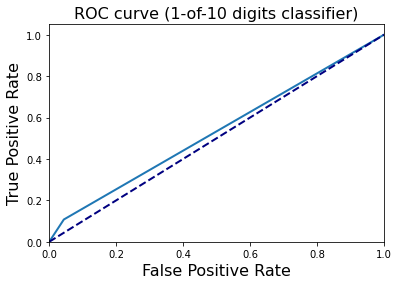

RandomForestClassifier
score on train data with RandomForestClassifier  : 0.9997390396659708
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
--------------------------------------------------------------------------

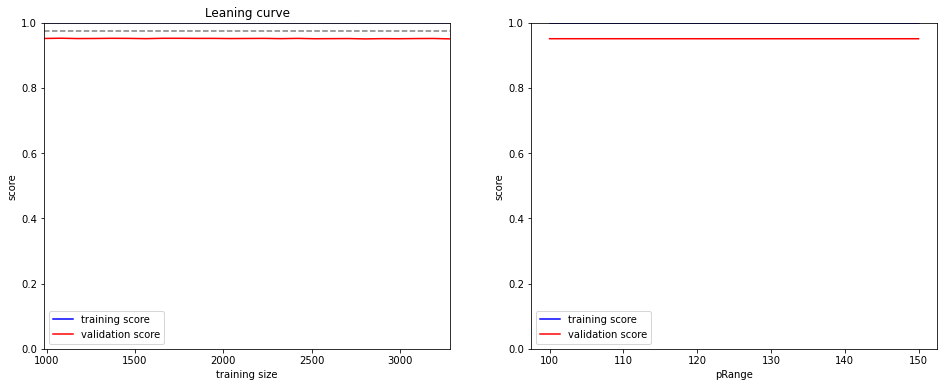

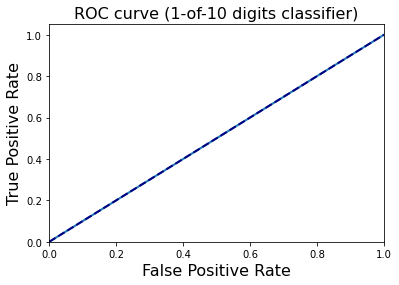

AdaBoostClassifier
score on train data with AdaBoostClassifier  : 0.9525052192066806
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier  : 0.9483568075117371
---------------------------------------------------------------------------------------
preceision:  0.3333333333333333
---------------------------------------------------------------------------------------
recall:  0.015384615384615385
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier )

            Not one     One 
    Not one  1211.0     2.0 
        One    64.0     1.0 
---------------------------------------------------------------------------------------
classification report:
 [[1211    2]
 [  64    1]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5068679053839812
-------------------------------------------

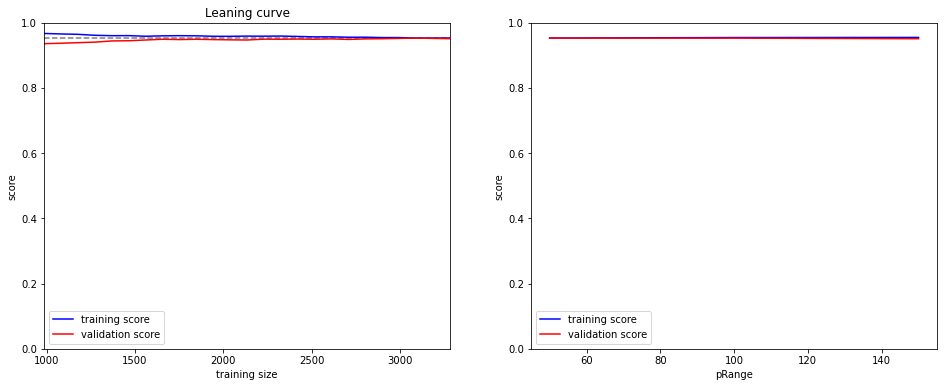

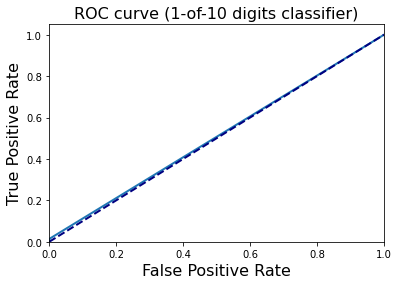

In [51]:
models('DummyClassifier',DummyClassifier(strategy = 'most_frequent'),x_train,y_train,x_test,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression',LogisticRegression(random_state=0),x_train,y_train,x_test,y_test,LogisticRegression(),'C',[1,7])
models('knn',KNeighborsClassifier(),x_train,y_train,x_test,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB',GaussianNB(),x_train,y_train,x_test,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine',SVC(random_state=0),x_train,y_train,x_test,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier',DecisionTreeClassifier(random_state=0),x_train,y_train,x_test,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier',RandomForestClassifier(random_state=0),x_train,y_train,x_test,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier',AdaBoostClassifier(random_state=0),x_train,y_train,x_test,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

In [52]:
results

Model Train_Score Test_Score Precision    Recall  \
0          DummyClassifier    0.951983   0.949139       0.0       0.0   
1      logistic regression    0.952244   0.948357       0.0       0.0   
2                      knn    0.953288   0.944444       0.2  0.030769   
3               guassianNB    0.871086   0.882629  0.202797  0.446154   
4   support vector machine    0.951983   0.949139       0.0       0.0   
5  DecisionTree Classifier         1.0   0.913146  0.116667  0.107692   
6   RandomForestClassifier    0.999739   0.949139       0.0       0.0   
7       AdaBoostClassifier    0.952505   0.948357  0.333333  0.015385   

        Auc        F1  
0       0.5       0.0  
1  0.499588       0.0  
2  0.512087  0.053333  
3  0.676086  0.278846  
4       0.5       0.0  
5  0.531999     0.112  
6       0.5       0.0  
7  0.506868  0.029412